In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sb 

import statsmodels.api as sm 
import statsmodels.discrete.discrete_model as smdm 
from sklearn.linear_model import LogisticRegression 

import nbformat 
from IPython import get_ipython 


import numpy as np 
import pandas as pd 
import seaborn as sb 
hp_d = pd.read_csv("../Datasets/House_Price.csv", header=0) 
hp_d  
shape_hp = hp_d.shape 
shape_hp  
hp_d.info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15

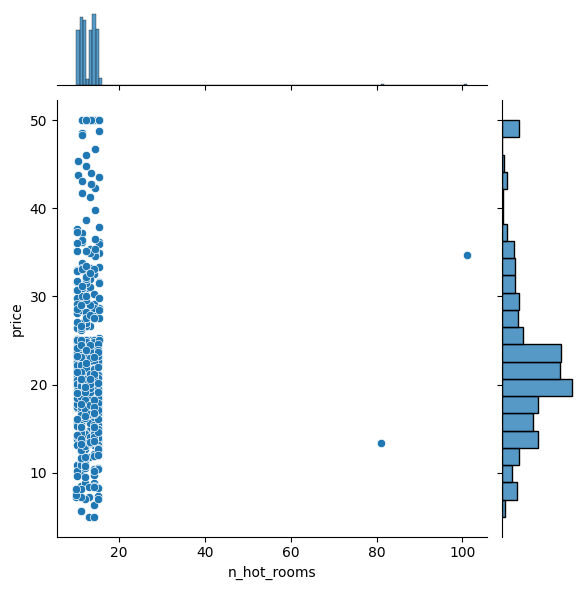

# rainfall to price 

sb.jointplot(x = "rainfall", y = "price", data=hp_d) 


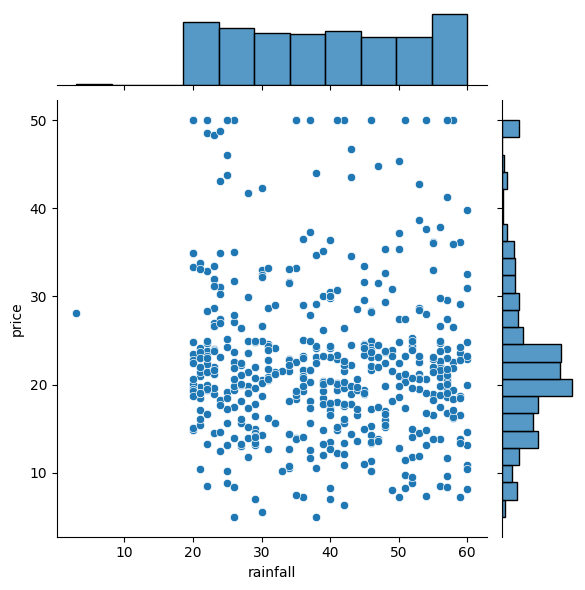

# Airport availability in each city (classification - yes/no) 

sb.countplot(x="airport", data=hp_d)


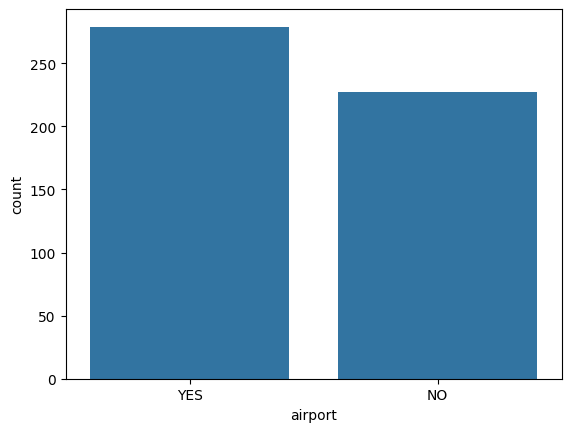

# Water body type count in each city (classification) 

sb.countplot(x="waterbody", data=hp_d) 


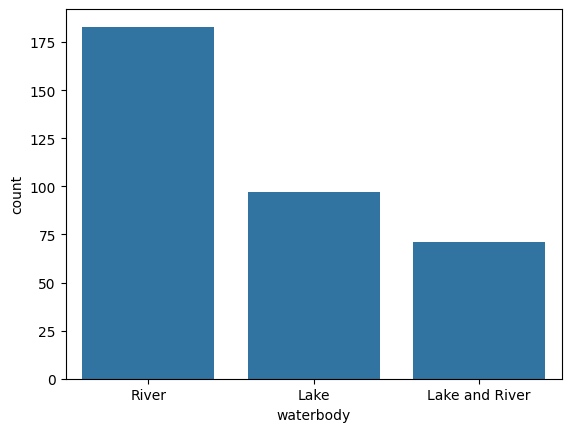

# bus terminal count 

sb.countplot(x="bus_ter", data=hp_d) 


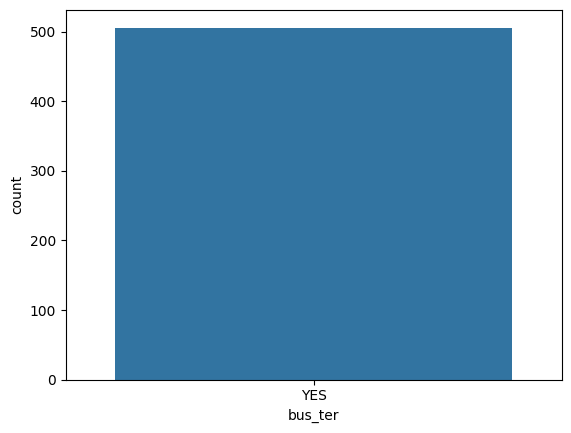

np.percentile(hp_d.n_hot_rooms, [99])      # 99th percentile 
up_pctl = np.percentile(hp_d.n_hot_rooms, [99])[0] 
up_pctl 
hp_gt_pctl = hp_d[(hp_d.n_hot_rooms > up_pctl)] 
hp_gt_pctl 
# n_hot_rooms have upper percentile value 15.39, and the outlier values to be seen here are at index 2 and 423. So we handle it with (* 3x). 

# hp_d.n_hot_rooms[(hp_d.n_hot_rooms > (3 * up_pctl))] = 3 * up_pctl 

hp_d.loc[(hp_d.n_hot_rooms > (3 * up_pctl)), 'n_hot_rooms'] = 3 * up_pctl 
hp_gt_pctl = hp_d[(hp_d.n_hot_rooms > up_pctl)] 
hp_gt_pctl 
np.percentile(hp_d.rainfall, [1])       # 1st percentile of rainfall 
lw_pctl = np.percentile(hp_d.rainfall, [1])[0] 
lw_pctl 
hp_lw_pctl = hp_d[(hp_d.rainfall < lw_pctl)] 
hp_lw_pctl 
# rainfall have lower percentile value 20 , and the outlier values to be seen here is at index 213. So we handle it with (* 0.3x). 

hp_d.loc[(hp_d.rainfall < (0.3 * lw_pctl)), 'rainfall'] = 0.3 * lw_pctl 
hp_lw_pctl = hp_d[(hp_d.rainfall < lw_pctl)] 
hp_lw_pctl 
# sb.jointplot(x=

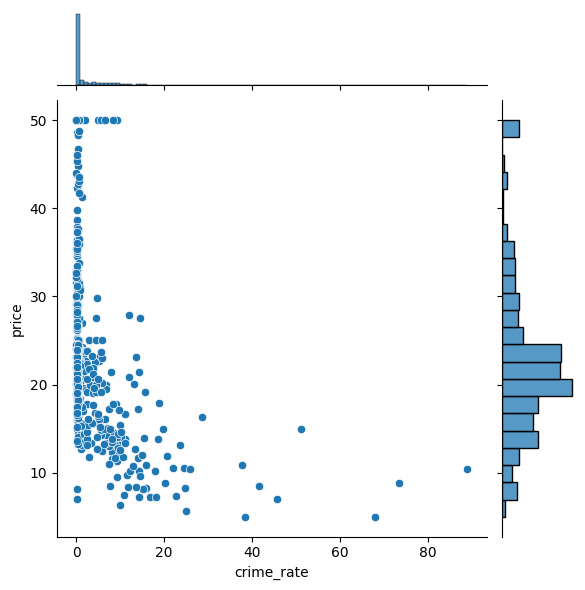

# Updated EDD, newer min for rainfall and max for hotel_room  

hp_d.describe() 
# Missing values handling 
# hp_d = hp_d.fillna(hp_d.mean()) 

hp_d.n_hos_beds = hp_d.n_hos_beds.fillna(hp_d.n_hos_beds.mean()) 
hp_d 

# hp_mean_hosbed = hp_d 
# hp_mean_hosbed 
hp_d.info()    # Updated table columns 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  ai

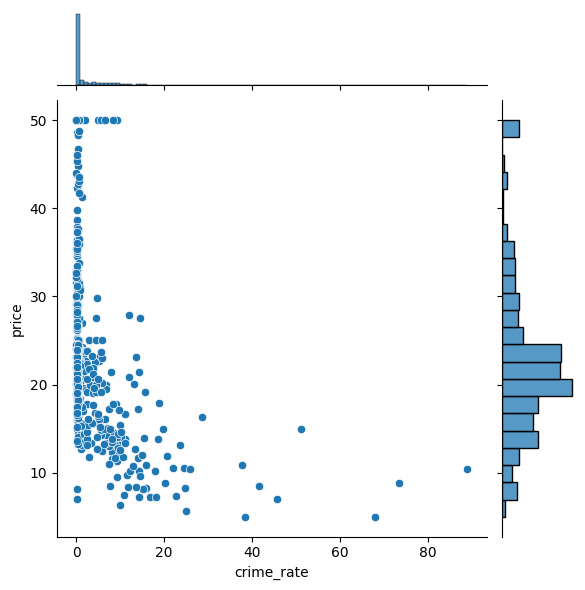

# Since the crime rate is dense near the area of 0 to 1 for X-axis, wee have to add constant to the log function, for better view and calculation along with to get a linear relationship.  

# hp_d.crime_rate = np.log(1 + hp_d.crime_rate) 
hp_d.crime_rate = np.log(3 + hp_d.crime_rate) 
hp_d 
sb.jointplot(x="crime_rate", y="price", data=hp_d)     # Updated crime_rate to work with analysis 


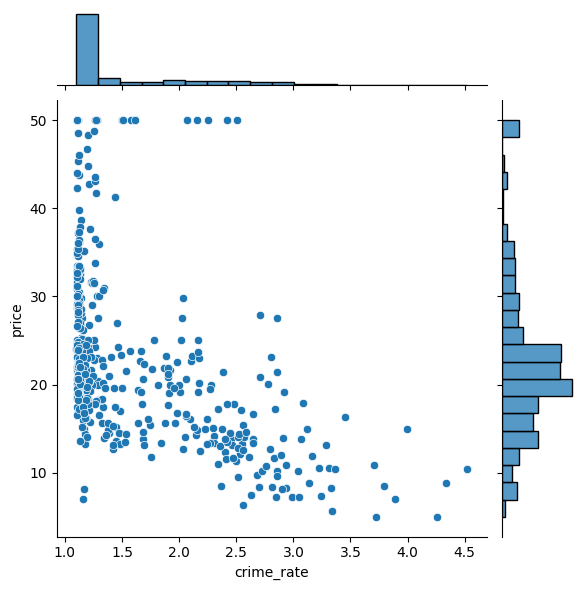

# Avg_dist is avg. dist for all given dists..

hp_d["Avg_dist"] = (hp_d.dist1 + hp_d.dist2 + hp_d.dist3 + hp_d.dist4) / 4 
hp_d 
print(hp_d.info()) 
print(hp_d.describe()) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  wat

In [2]:
# %run "../Data_Preprocessing/data_preprocess.ipynb" 

with open("../Data_Preprocessing/data_preprocess.ipynb", "r", encoding="utf-8") as f:
    notebook1 = nbformat.read(f, as_version=4)

ipython = get_ipython() 

for cell in notebook1.cells:
    if cell.cell_type == "code":
        print(cell.source) 
        if ("hp_cleaned" in cell.source or "hp_d" in cell.source):
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("\nHouse Price Cleaned Data : ")
    print(hp_cleaned.head())   # type: ignore 
    
except NameError as e:
    print(f"Variable not found: {e}")

In [3]:
hp_cleaned  # type: ignore 

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,Avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,1.100717,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,1.107674,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,1.107668,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,1.109344,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,1.121368,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,1.119274,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,1,2.4775,0,0,1,0
502,20.6,1.113590,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,1,2.2875,1,0,1,0
503,23.9,1.118663,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,1,2.1675,0,0,0,0
504,22.0,1.134491,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,1,2.3900,1,0,0,0


Logistic Regression with sklearn 

In [4]:
X = hp_cleaned[['price']]     # type: ignore 
X 

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
y = hp_cleaned['Sold']      # type: ignore 
y 

0      0
1      1
2      0
3      0
4      0
      ..
501    1
502    1
503    1
504    1
505    1
Name: Sold, Length: 506, dtype: int64

In [6]:
cls_logi_reg = LogisticRegression() 
cls_logi_reg.fit(X, y)         # X and y are dependent variables 

logm_intercept = cls_logi_reg.intercept_     # beta_0 value 
logm_coeff = cls_logi_reg.coef_              # beta_n value 
print("Logarithmic classification model intercept = ", logm_intercept, "\nLogarithmic classification model coefficient = ", logm_coeff) 

# print("Logarithmic classification model intercept = ", logm_intercept, "\nLogarithmic classification model coefficient = ", logm_coeff[0]) 

Logarithmic classification model intercept =  [0.61477516] 
Logarithmic classification model coefficient =  [[-0.03571865]]


Logistic Regression with statsmodels 

In [7]:
X_cons = sm.add_constant(X) 
X_cons  

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2
...,...,...
501,1.0,22.4
502,1.0,20.6
503,1.0,23.9
504,1.0,22.0


In [8]:
# logit = smdm.Logit(y, X_cons).fit() 
logit = sm.Logit(y, X_cons).fit() 
logit.summary() 

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                 0.01788
Time:                        12:58:24   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

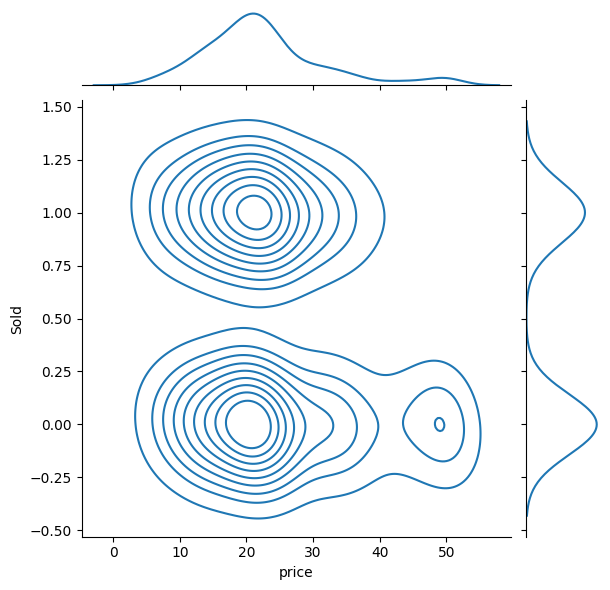

In [9]:
sb.jointplot(x=hp_cleaned['price'], y=hp_cleaned['Sold'], data=hp_cleaned, kind='kde')     # type: ignore  